In [8]:
import os
import sys

from acrg.name import name

sys.path.insert(0, os.path.join('/user', 'home', 'vf20487', 'code', 'Hannah/'))
from Functions.han_func import show_map

In [2]:
year = 2015

In [4]:
ocean_flux = {model: name.flux(domain = 'EUROPE',
                               species = f'o2-{model}-ocean-{res}',
                               start = f'{year}-01-01',
                               end = f'{year+1}-01-01')
              for model, res in {'ecco': 'day', 'nemo': 'mth'}.items()}


Searching for flux files: /group/chemistry/acrg/LPDM/emissions/EUROPE/o2-ecco-ocean-day_*.nc
Reading and concatenating files: 
/group/chemistry/acrg/LPDM/emissions/EUROPE/o2-ecco-ocean-day_EUROPE_2015.nc
/group/chemistry/acrg/LPDM/emissions/EUROPE/o2-ecco-ocean-day_EUROPE_2016.nc
Slicing time to range 2015-01-01 00:00:00 - 2015-12-31 23:59:59

Searching for flux files: /group/chemistry/acrg/LPDM/emissions/EUROPE/o2-nemo-ocean-mth_*.nc
Reading and concatenating files: 
/group/chemistry/acrg/LPDM/emissions/EUROPE/o2-nemo-ocean-mth_EUROPE_2015.nc
Slicing time to range 2015-01-01 00:00:00 - 2015-12-31 23:59:59


In [6]:
ocean_flux['nemo'] = ocean_flux['nemo'].reindex_like(ocean_flux['ecco'], method='ffill')

In [7]:
ocean_diff = ocean_flux['ecco'] - ocean_flux['nemo']

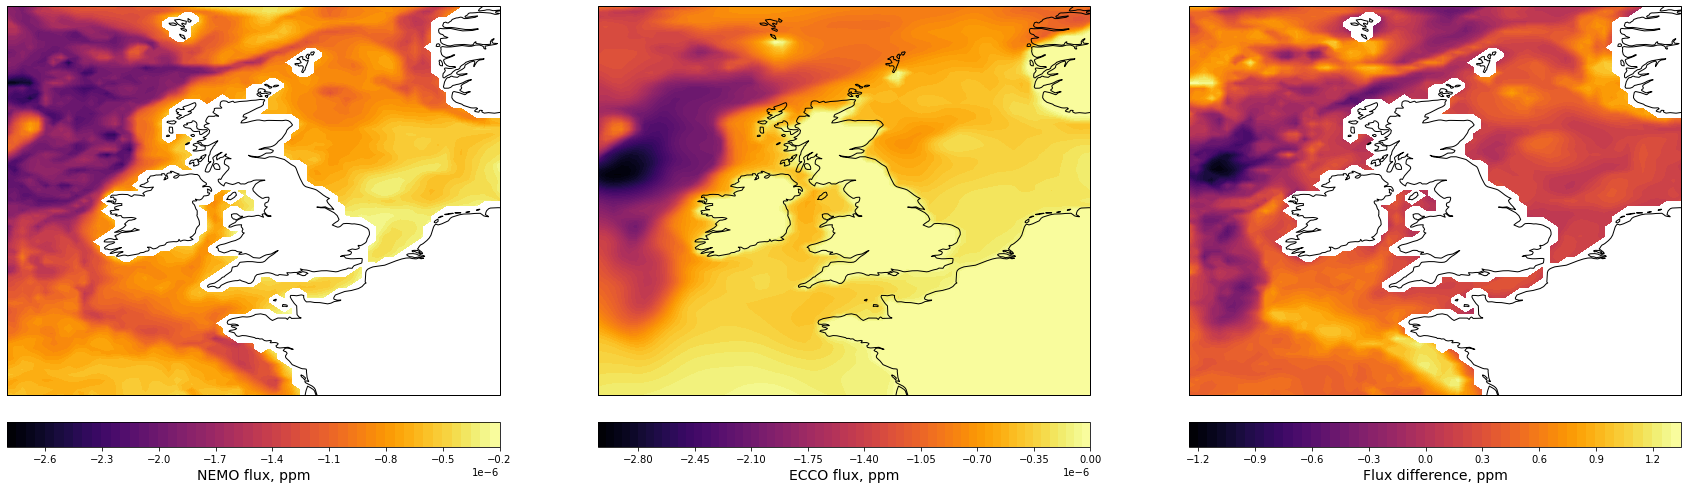

In [15]:
labels = [{'label': 'NEMO flux, ppm', 'fontsize': 14},
          {'label': 'ECCO flux, ppm', 'fontsize': 14},
          {'label': 'Flux difference, ppm', 'fontsize': 14}]

ax = show_map(data = [ocean_flux['nemo'].flux[:,:,0],
                      ocean_flux['ecco'].flux[:,:,0],
                      ocean_diff.flux[:,:,0]*1e6],
              coast_color='black',
              crop_uk = True,
              colorbar_label_kwargs = labels)